In [1]:
SCRIPTS_PATH = 'scripts'
APIMODEL_PATH = 'models'
ANNOTATION_PATH = 'annotations'
TRAIN_IMAGE_PATH = 'images/train'
TEST_IMAGE_PATH = 'images/test'
MODEL_PATH = 'models'
CHECKPOINT = 'checkpoints'
PRETRAINED_MODEL_PATH = 'pre-trained-models'
CONFIG_PATH = MODEL_PATH+'/my_ssd_mobnet/pipeline.config'
CHECKPOINT_PATH = MODEL_PATH+'/my_ssd_mobnet/'

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
data_path = TRAIN_IMAGE_PATH

classes = ['hello', 'am', 'can', 'see', 'what', 'you', 'name', 'please',
          'yes','it', 'do', 'is', ]
image_counts = {}

for class_name in classes:
    folder_path = os.path.join(data_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[class_name] = len(image_files)

frame_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'ImageCount'])
frame_counts

,Class,ImageCount
0,hello,17
1,am,19
2,can,19
3,see,19
4,what,19
5,you,19
6,name,19
7,please,19
8,yes,19
9,it,19


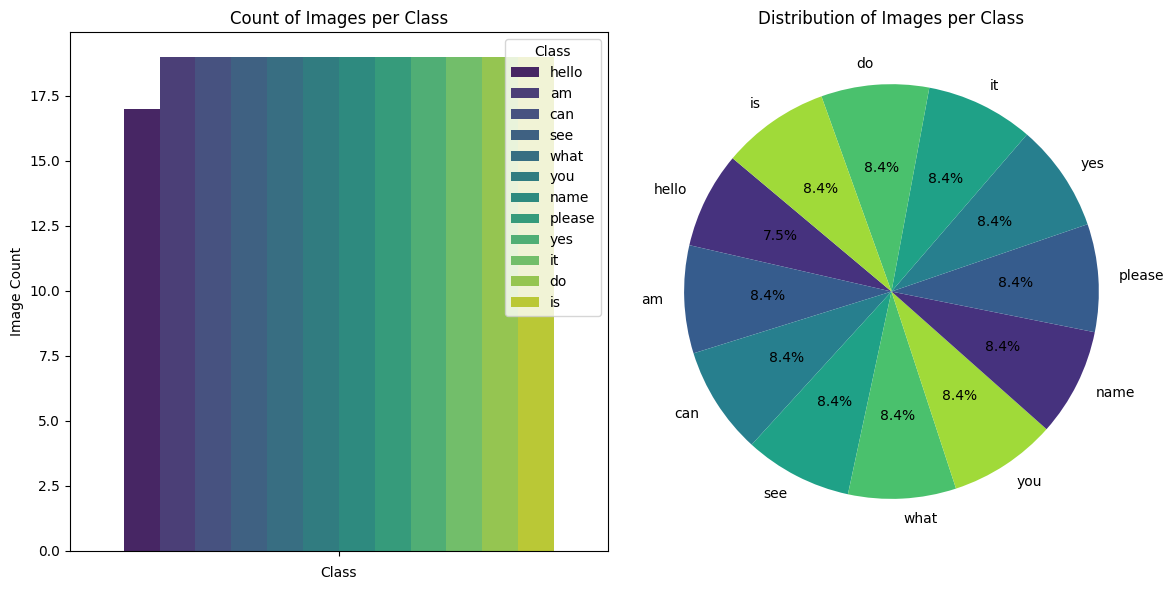

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=frame_counts, hue
            
            ='Class', y='ImageCount', palette="viridis")
plt.title('Count of Images per Class')
plt.ylabel('Image Count')
plt.xlabel('Class')

plt.subplot(1, 2, 2)
plt.pie(frame_counts['ImageCount'], labels=frame_counts['Class'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Distribution of Images per Class')

plt.tight_layout()
plt.show()

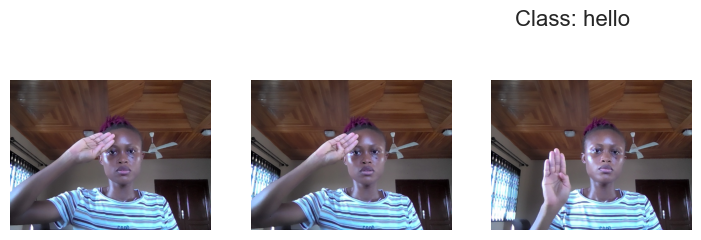

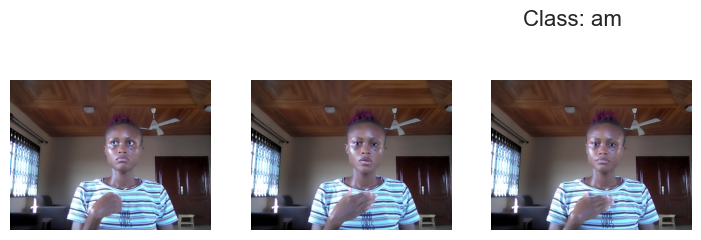

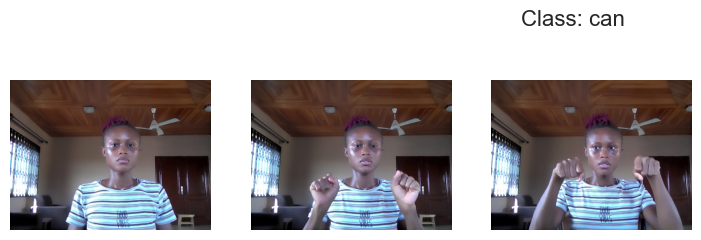

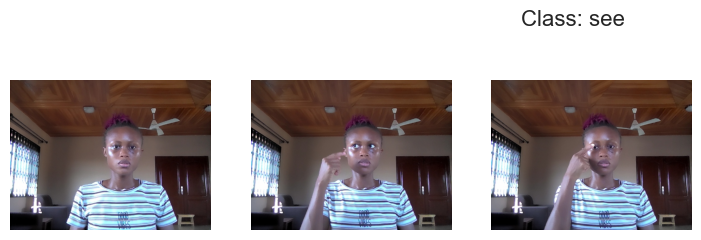

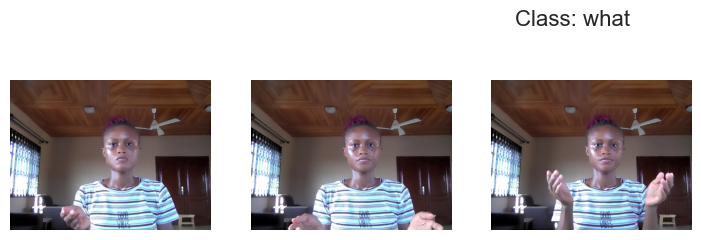

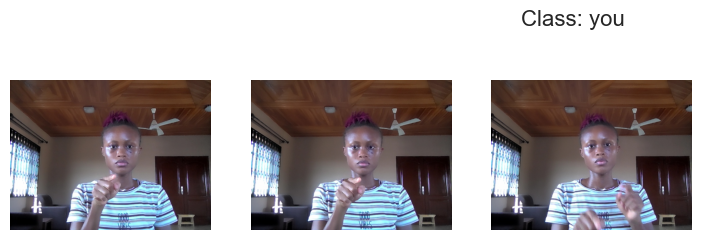

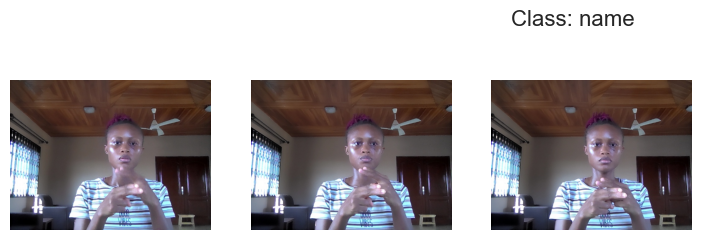

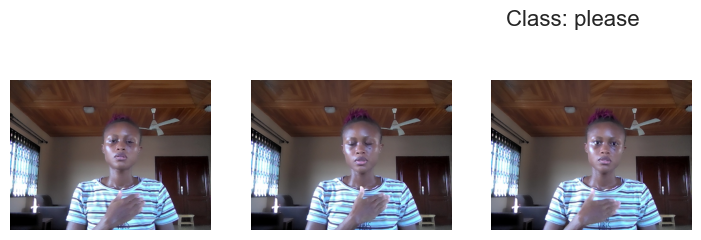

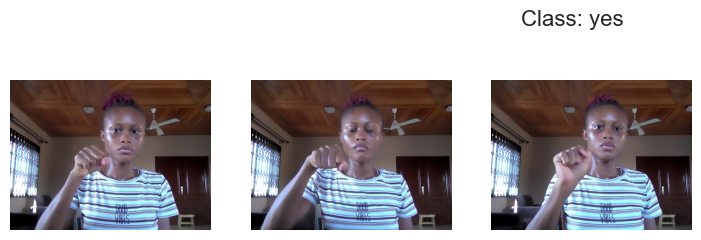

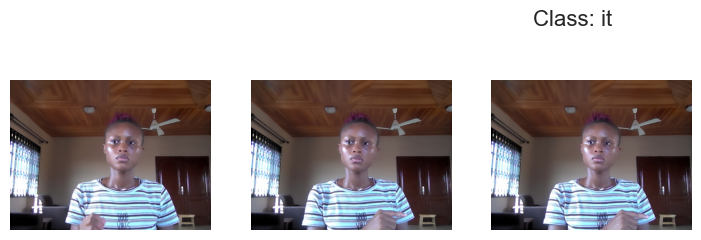

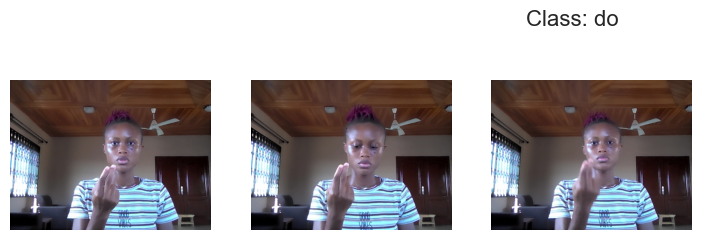

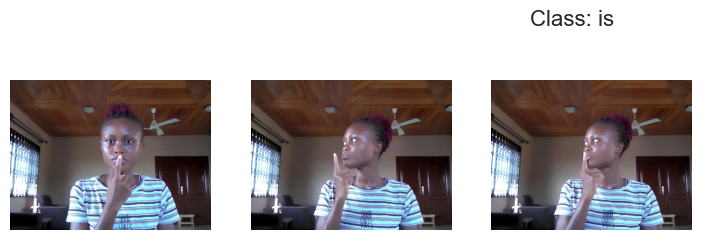

In [184]:
for class_name in classes:
    folder_path = os.path.join(data_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:3]  
    
    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=16)
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    
    plt.show()

In [5]:
image_data = []

folders = {'hello': 4, 'am': 1, 'can': 2, 'see': 9, 'what': 10, 'you': 12, 'name': 7, 'please': 8,
          'yes': 11,'it': 6, 'do': 3, 'is': 5}

for folder_name, label in folders.items():
    folder_path = os.path.join(data_path, folder_name)
    
    if os.path.exists(folder_path):
        image_files = os.listdir(folder_path)
        
        for image_file in image_files:
            image_data.append((os.path.join(folder_path, image_file), label))
    else:
        print(f"Folder {folder_path} not found.")

frames = pd.DataFrame(image_data, columns=['image_path', 'label'])

In [6]:
frames.head()

,image_path,label
0,images/train\hello\hello.1110e70b-8d5e-11ef-93...,4
1,images/train\hello\hello.1110e70b-8d5e-11ef-93...,4
2,images/train\hello\hello.12445943-8d5e-11ef-a6...,4
3,images/train\hello\hello.12445943-8d5e-11ef-a6...,4
4,images/train\hello\hello.13776db5-8d5e-11ef-bc...,4


In [7]:
frames.tail()

,image_path,label
448,images/train\is\is.e331f957-8d5e-11ef-8e4d-5c8...,5
449,images/train\is\is.e466cc85-8d5e-11ef-bfa7-5c8...,5
450,images/train\is\is.e466cc85-8d5e-11ef-bfa7-5c8...,5
451,images/train\is\is.e599f08e-8d5e-11ef-aa98-5c8...,5
452,images/train\is\is.e599f08e-8d5e-11ef-aa98-5c8...,5


In [8]:
frames.shape

(453, 2)

In [9]:
frames.columns

Index(['image_path', 'label'], dtype='object')

In [10]:
frames.duplicated().sum()

0

In [11]:
frames.isnull().sum()

image_path    0
label         0
dtype: int64

In [12]:
frames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  453 non-null    object
 1   label       453 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ROS.fit_resample(frames[['image_path']], frames['label'])
frames_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
frames_resampled['label'] = y_resampled

In [14]:
print("\nClass distribution after oversampling:")
print(frames_resampled['label'].value_counts())


Class distribution after oversampling:
label
4     39
1     39
2     39
9     39
10    39
12    39
7     39
8     39
11    39
6     39
3     39
5     39
Name: count, dtype: int64


In [15]:
frames_resampled

,image_path,label
0,images/train\hello\hello.1110e70b-8d5e-11ef-93...,4
1,images/train\hello\hello.1110e70b-8d5e-11ef-93...,4
2,images/train\hello\hello.12445943-8d5e-11ef-a6...,4
3,images/train\hello\hello.12445943-8d5e-11ef-a6...,4
4,images/train\hello\hello.13776db5-8d5e-11ef-bc...,4
...,...,...
463,images/train\please\Please.a5feabf3-8d5e-11ef-...,8
464,images/train\see\see.2437c91f-8d5f-11ef-8db0-5...,9
465,images/train\what\what.27bc3be7-8d60-11ef-99d7...,10
466,images/train\yes\Yes.2a3cb423-8d5e-11ef-b35b-5...,11


In [16]:
from PIL import Image

import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')


In [17]:
frames_resampled['label'] = frames_resampled['label'].astype(str)

In [18]:
train_data, temp_data = train_test_split(
    frames_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=frames_resampled['label']  
)

validation_data, test_data = train_test_split(
    temp_data,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_data['label'] 
)

In [19]:
batch_size = 16
img_size = (224, 224)
channels = 21
img_shape = (img_size[0], img_size[1], channels)

train_gen = ImageDataGenerator(rescale=1./255)  
test_gen = ImageDataGenerator(rescale=1./255)

gen_train = train_gen.flow_from_dataframe(
    train_data,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

gen_valid = test_gen.flow_from_dataframe(
    validation_data,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

gen_test = test_gen.flow_from_dataframe(
    test_data,
    x_col='image_path', 
    y_col='label',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 185 validated image filenames belonging to 12 classes.
Found 23 validated image filenames belonging to 11 classes.
Found 26 validated image filenames belonging to 11 classes.


In [20]:
train_classes = set(gen_train.class_indices.keys())
valid_classes = set(gen_valid.class_indices.keys())
test_classes = set(gen_test.class_indices.keys())

missing_in_valid = train_classes - valid_classes
missing_in_test = train_classes - test_classes

print("Classes missing in validation set:", missing_in_valid)
print("Classes missing in test set:", missing_in_test)


Classes missing in validation set: {'8'}
Classes missing in test set: {'10'}


In [49]:
from sklearn.metrics import classification_report
import numpy as np

# List of classes found in each set
validation_classes = sorted(set(gen_valid.classes))  # Unique classes in validation set
test_classes = sorted(set(gen_test.classes))  # Unique classes in test set

# Evaluate on Validation Set
validation_predictions = cnn_model.predict(gen_valid)
validation_pred_classes = np.argmax(validation_predictions, axis=1)
validation_filtered_labels = [label for label in gen_valid.classes if label in validation_classes]
validation_filtered_preds = [pred for idx, pred in enumerate(validation_pred_classes) if gen_valid.classes[idx] in validation_classes]

validation_report = classification_report(validation_filtered_labels, validation_filtered_preds, labels=validation_classes, target_names=[str(cls) for cls in validation_classes])
print("Validation Set Report:")
print(validation_report)

# Evaluate on Test Set
test_predictions = cnn_model.predict(gen_test)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_filtered_labels = [label for label in gen_test.classes if label in test_classes]
test_filtered_preds = [pred for idx, pred in enumerate(test_pred_classes) if gen_test.classes[idx] in test_classes]

test_report = classification_report(test_filtered_labels, test_filtered_preds, labels=test_classes, target_names=[str(cls) for cls in test_classes])
print("Test Set Report:")
print(test_report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 464ms/step
Validation Set Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.20      0.50      0.29         4
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2

   micro avg       0.15      0.09      0.11        23
   macro avg       0.02      0.05      0.03        23
weighted avg       0.03      0.09      0.05        23

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 583ms/step
Test Set Report:
              precision    recall  f1-score   support

           0  

In [22]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [24]:
def xception_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)  
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(21, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [25]:
history = cnn_model.fit(
    gen_train,
    validation_data=gen_valid,
    epochs=21,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/21
12/12 ━━━━━━━━━━━━━━━━━━━━ 161s 9s/step - accuracy: 0.3821 - loss: 2.3621 - val_accuracy: 0.1304 - val_loss: 2.5463
Epoch 2/21
12/12 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - accuracy: 0.8228 - loss: 0.6543 - val_accuracy: 0.2609 - val_loss: 2.7142
Epoch 3/21
12/12 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - accuracy: 0.8412 - loss: 0.5222 - val_accuracy: 0.1739 - val_loss: 2.4220
Epoch 4/21
12/12 ━━━━━━━━━━━━━━━━━━━━ 223s 18s/step - accuracy: 0.9515 - loss: 0.2730 - val_accuracy: 0.4348 - val_loss: 1.8251
Epoch 5/21
12/12 ━━━━━━━━━━━━━━━━━━━━ 138s 10s/step - accuracy: 0.9437 - loss: 0.1878 - val_accuracy: 0.3043 - val_loss: 2.0730
Epoch 6/21
12/12 ━━━━━━━━━━━━━━━━━━━━ 164s 14s/step - accuracy: 0.9798 - loss: 0.1576 - val_accuracy: 0.2174 - val_loss: 2.4565
Epoch 7/21
12/12 ━━━━━━━━━━━━━━━━━━━━ 128s 11s/step - accuracy: 0.9954 - loss: 0.0755 - val_accuracy: 0.3043 - val_loss: 2.1370
Epoch 8/21
12/12 ━━━━━━━━━━━━━━━━━━━━ 113s 9s/step - accuracy: 1.0000 - loss: 0.0646 - val_accuracy: 0.3913 -

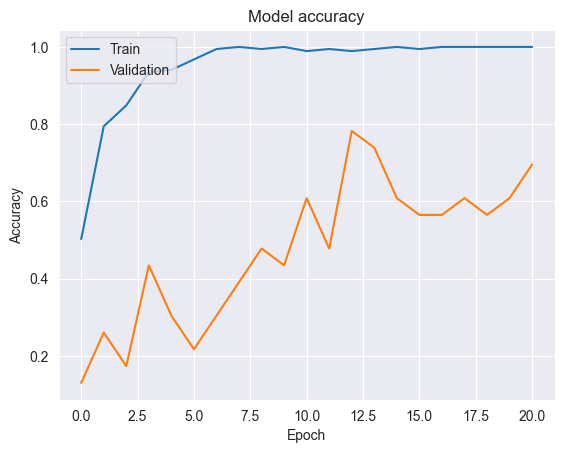

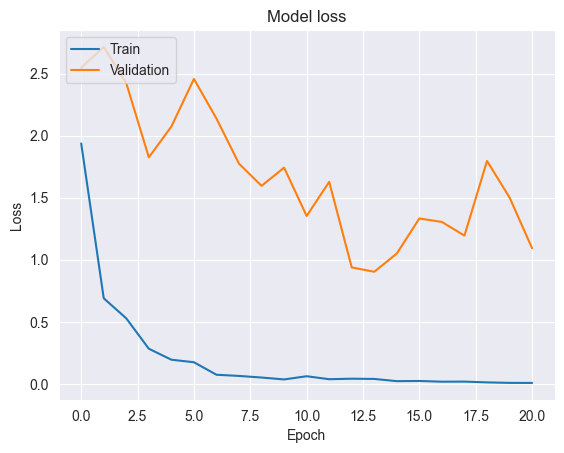

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
test_labels = gen_test.classes  
predictions = cnn_model.predict(gen_test)  
predicted_classes = np.argmax(predictions, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step


In [29]:
target_names = list(gen_test.class_indices.keys())
labels = list(range(len(gen_test.class_indices)))
report = classification_report(test_labels, predicted_classes, labels=labels, target_names=target_names)
print(report)

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
          11       0.00      0.00      0.00         3
          12       0.25      0.33      0.29         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

   micro avg       0.16      0.15      0.16        26
   macro avg       0.09      0.12      0.10        26
weighted avg       0.12      0.15      0.13        26



In [30]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

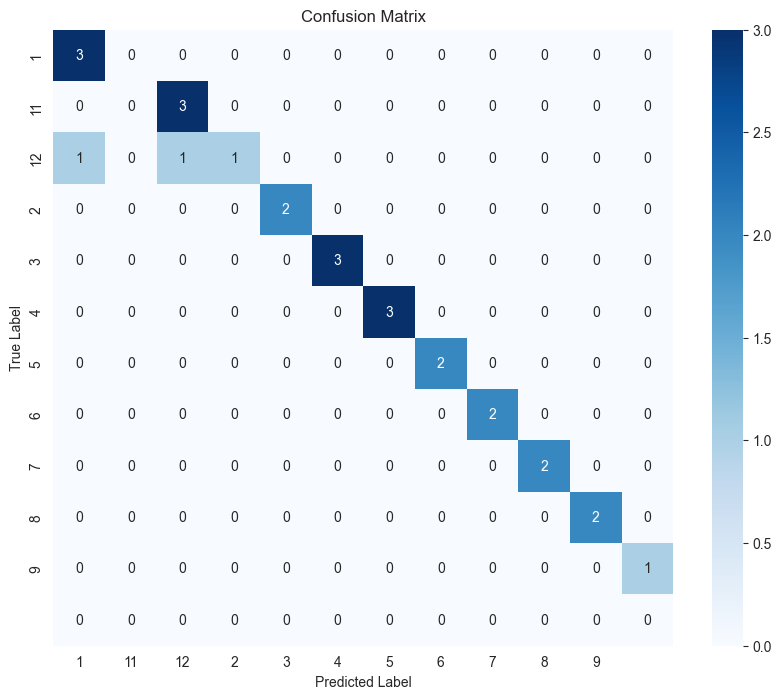

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(gen_test.class_indices.keys()), yticklabels=list(gen_test.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):
    
    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x) 

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)  

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(21, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [33]:
history = cnn_model.fit(
    gen_train,
    validation_data=gen_valid,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 360s 21s/step - accuracy: 0.3612 - loss: 2.4816 - val_accuracy: 0.2609 - val_loss: 3.8704
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 310s 21s/step - accuracy: 0.8467 - loss: 0.6549 - val_accuracy: 0.1739 - val_loss: 7.2072
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9397 - loss: 0.2953 - val_accuracy: 0.2174 - val_loss: 8.3251
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 280s 25s/step - accuracy: 0.9505 - loss: 0.1872 - val_accuracy: 0.2174 - val_loss: 6.5556
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9807 - loss: 0.1011 - val_accuracy: 0.2174 - val_loss: 6.0183
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.9864 - loss: 0.0566 - val_accuracy: 0.2174 - val_loss: 4.7426
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 86s 7s/step - accuracy: 0.9839 - loss: 0.0491 - val_accuracy: 0.2609 - val_loss: 4.0972
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 335s 29s/step - accuracy: 1.0000 - loss: 0.0181 - val_accuracy: 0.3478 - v

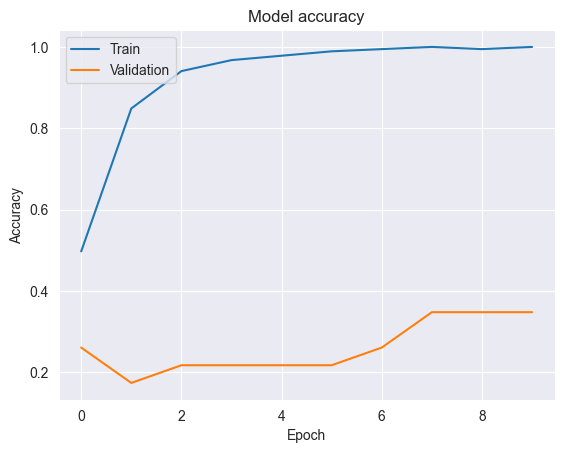

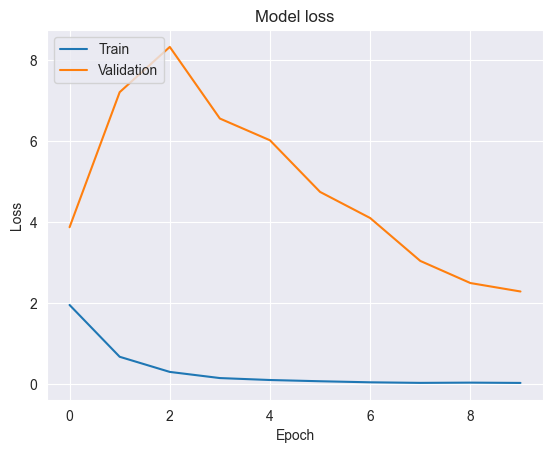

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
test_labels = gen_test.classes  
predictions = cnn_model.predict(gen_test)  
predicted_classes = np.argmax(predictions, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step


In [50]:
report = classification_report(test_labels, predicted_classes, target_names=list(gen_test.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.05      0.50      0.09         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.04        26
   macro avg       0.00      0.05      0.01        26
weighted avg       0.00      0.04      0.01        26



In [37]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

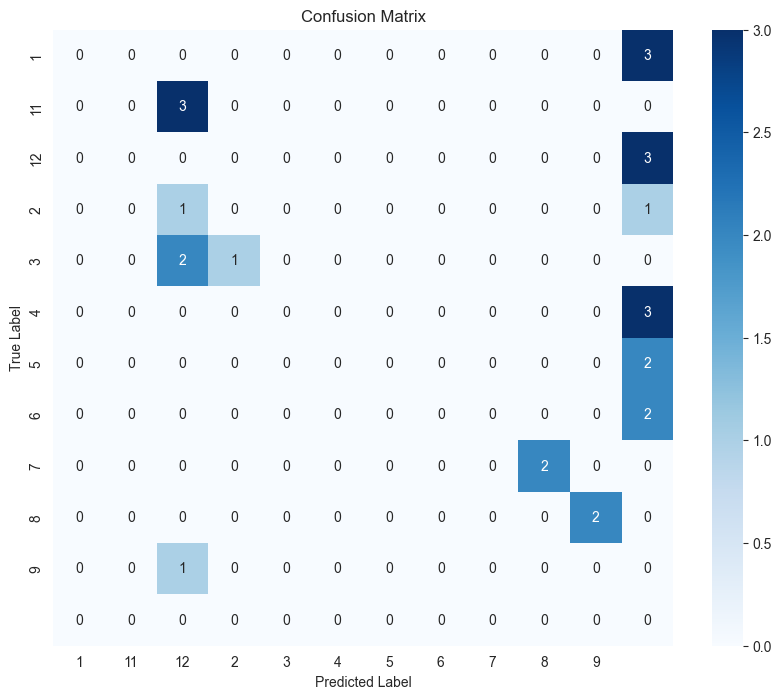

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(gen_test.class_indices.keys()), yticklabels=list(gen_test.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [41]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_densenet_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = DenseNet121(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    x = base_model.output
    
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels))(x)
    
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(12, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

input_shape = (224, 224, 3)
densenet_model = create_densenet_model(input_shape)

densenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [42]:
history = densenet_model.fit(
    gen_train,
    validation_data=gen_valid,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.3926 - loss: 1.9277 - val_accuracy: 0.2174 - val_loss: 2.3720
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8354 - loss: 0.5039 - val_accuracy: 0.2609 - val_loss: 2.3157
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9250 - loss: 0.2511 - val_accuracy: 0.2174 - val_loss: 2.1721
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9757 - loss: 0.1368 - val_accuracy: 0.2174 - val_loss: 1.9966
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9849 - loss: 0.0886 - val_accuracy: 0.3478 - val_loss: 1.7033


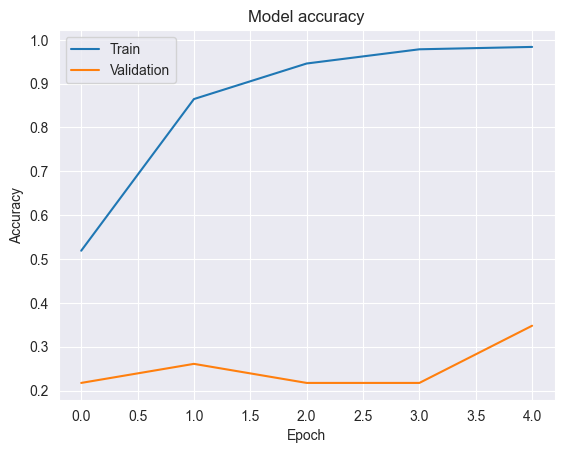

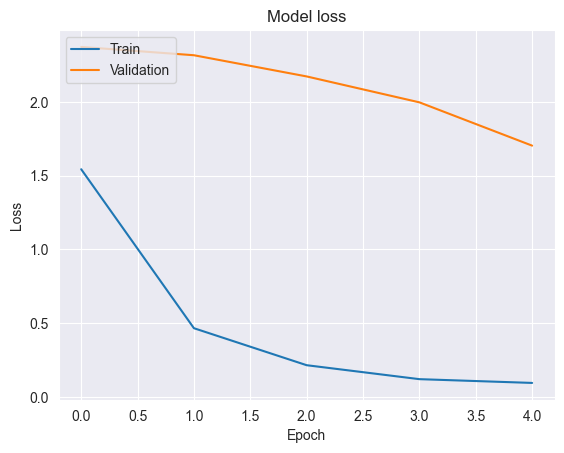

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
test_labels = gen_test.classes  
predictions = densenet_model.predict(gen_test)  
predicted_classes = np.argmax(predictions, axis=1)

1/2 ━━━━━━━━━━━━━━━━━━━━ 7s 8s/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002125DA6DEE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step


In [45]:
report = classification_report(test_labels, predicted_classes, target_names=list(gen_test.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.05      0.50      0.09         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.04        26
   macro avg       0.00      0.05      0.01        26
weighted avg       0.00      0.04      0.01        26



In [46]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

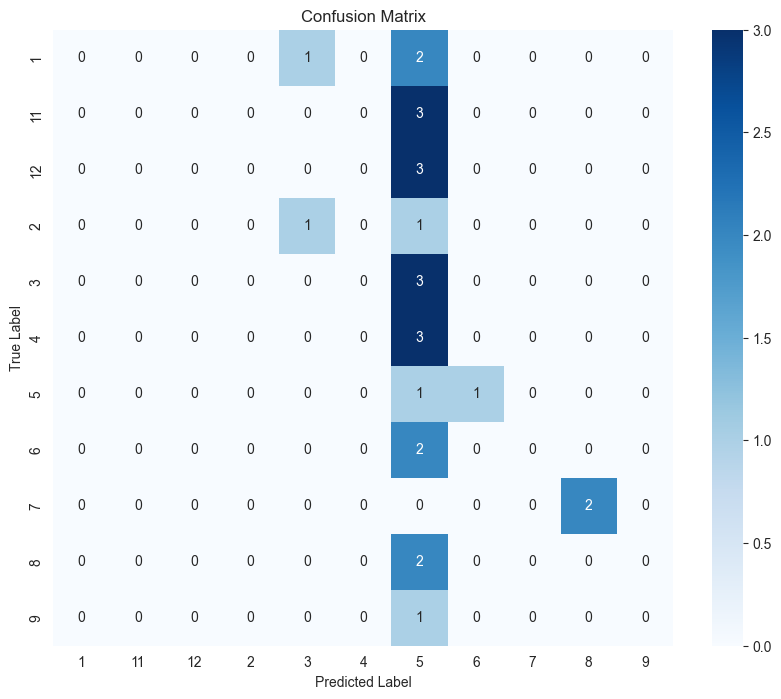

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(gen_test.class_indices.keys()), yticklabels=list(gen_test.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
## This is on crazy ML project I just worked on. I think the issue may be the dataset I am working with. 
# dataset with my camera using me as model. Now I am going to get dataset from online (Kaggle) and test with that.
# This was quite educating. Adios!!